In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [47]:
input_file = '../data/sorted_filled_data_cancel.pkl'

In [79]:
df = pd.read_pickle(input_file)
df = df.drop(columns=df.columns[0])
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,Subscription Premium Cancel
0,0006869712ec9841dc36234bce245203,MD,Add Payment Method Success,"{""Payment Method"":""Debit"",""Tokenized Pay"":""""}",2022-01-19 18:47:45,android,samsung,SM-A716U,0
1,0006869712ec9841dc36234bce245203,MD,Subscription Premium,"{""Start Date"":""2022-01-19"",""Renewal Date"":""202...",2022-01-19 18:48:01,android,samsung,SM-A716U,0
2,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-01-19 18:48:08,android,samsung,SM-A716U,0
3,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-01-19 18:48:44,android,samsung,SM-A716U,0
4,0006869712ec9841dc36234bce245203,MD,Add Vehicle Success,"{""Make"":""Chevrolet"",""Model"":""Express 3500"",""Co...",2022-01-19 18:50:34,android,samsung,SM-A716U,0


In [80]:
cleared_df = df.drop(['user_state', 'event_attributes', 'event_created_date', 'event_platform', 'device_manufacture', 'device_model'], axis=1)
cleared_df.head()

,userid,event_name,Subscription Premium Cancel
0,0006869712ec9841dc36234bce245203,Add Payment Method Success,0
1,0006869712ec9841dc36234bce245203,Subscription Premium,0
2,0006869712ec9841dc36234bce245203,Account History Transaction Details,0
3,0006869712ec9841dc36234bce245203,Account History Transaction Details,0
4,0006869712ec9841dc36234bce245203,Add Vehicle Success,0


In [81]:
one_hot = pd.get_dummies(cleared_df['event_name'])
cleared_df_no_events = cleared_df.drop(['event_name', 'Subscription Premium Cancel'], axis=1)
encoded_df = cleared_df_no_events.join(one_hot)
encoded_df.head()

,userid,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Calculator Used,...,Order,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Transaction Refund,Wallet Opened
0,0006869712ec9841dc36234bce245203,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0006869712ec9841dc36234bce245203,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0006869712ec9841dc36234bce245203,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0006869712ec9841dc36234bce245203,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0006869712ec9841dc36234bce245203,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
encoded_df_sum = encoded_df.groupby(['userid']).sum()
encoded_df_sum.head()

,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Calculator Used,Calculator View,...,Order,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Transaction Refund,Wallet Opened
userid,,,,,,,,,,,,,,,,,,,,,
0006869712ec9841dc36234bce245203,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
00596aa4edee32815aaf4aad659c484e,0,0,0,0,2,0,0,1,0,0,...,3,0,0,0,1,1,0,0,0,0
007b54670d72df309afd87befcbb63db,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
0136a8eeca5d16ac1a521dd0e27ecec0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,2,0,0
01529f53aaba5b512168d432d5650556,2,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [89]:
encoded_df_sum['Actions Total'] = encoded_df_sum.iloc[1:, :].sum(axis=1)

In [90]:
cols = list(encoded_df_sum.columns.values)
cols.remove('Subscription Premium Cancel')
cols = ['Subscription Premium Cancel'] + cols
encoded_df_sum = encoded_df_sum[cols]

In [92]:
misc_actions = ['Account History Transaction Details', 'Account Setup Profile Skip', 'Account Setup Skip', 'Add Payment Method Failed', 'Chat Conversation Opened', 'Chat Conversation Started', 'Email Confirmation Success', 'Reset Password Set', 'Sign Out', 'Subscription Premium', 'Subscription Premium Cancel', 'Subscription Premium Renew', 'Transaction Refund', 'Wallet Opened']
actions_of_interest = [item for item in cols if item not in misc_actions]
encoded_df_sum['Useful Actions Total'] =  sum(encoded_df_sum[action] for action in actions_of_interest)

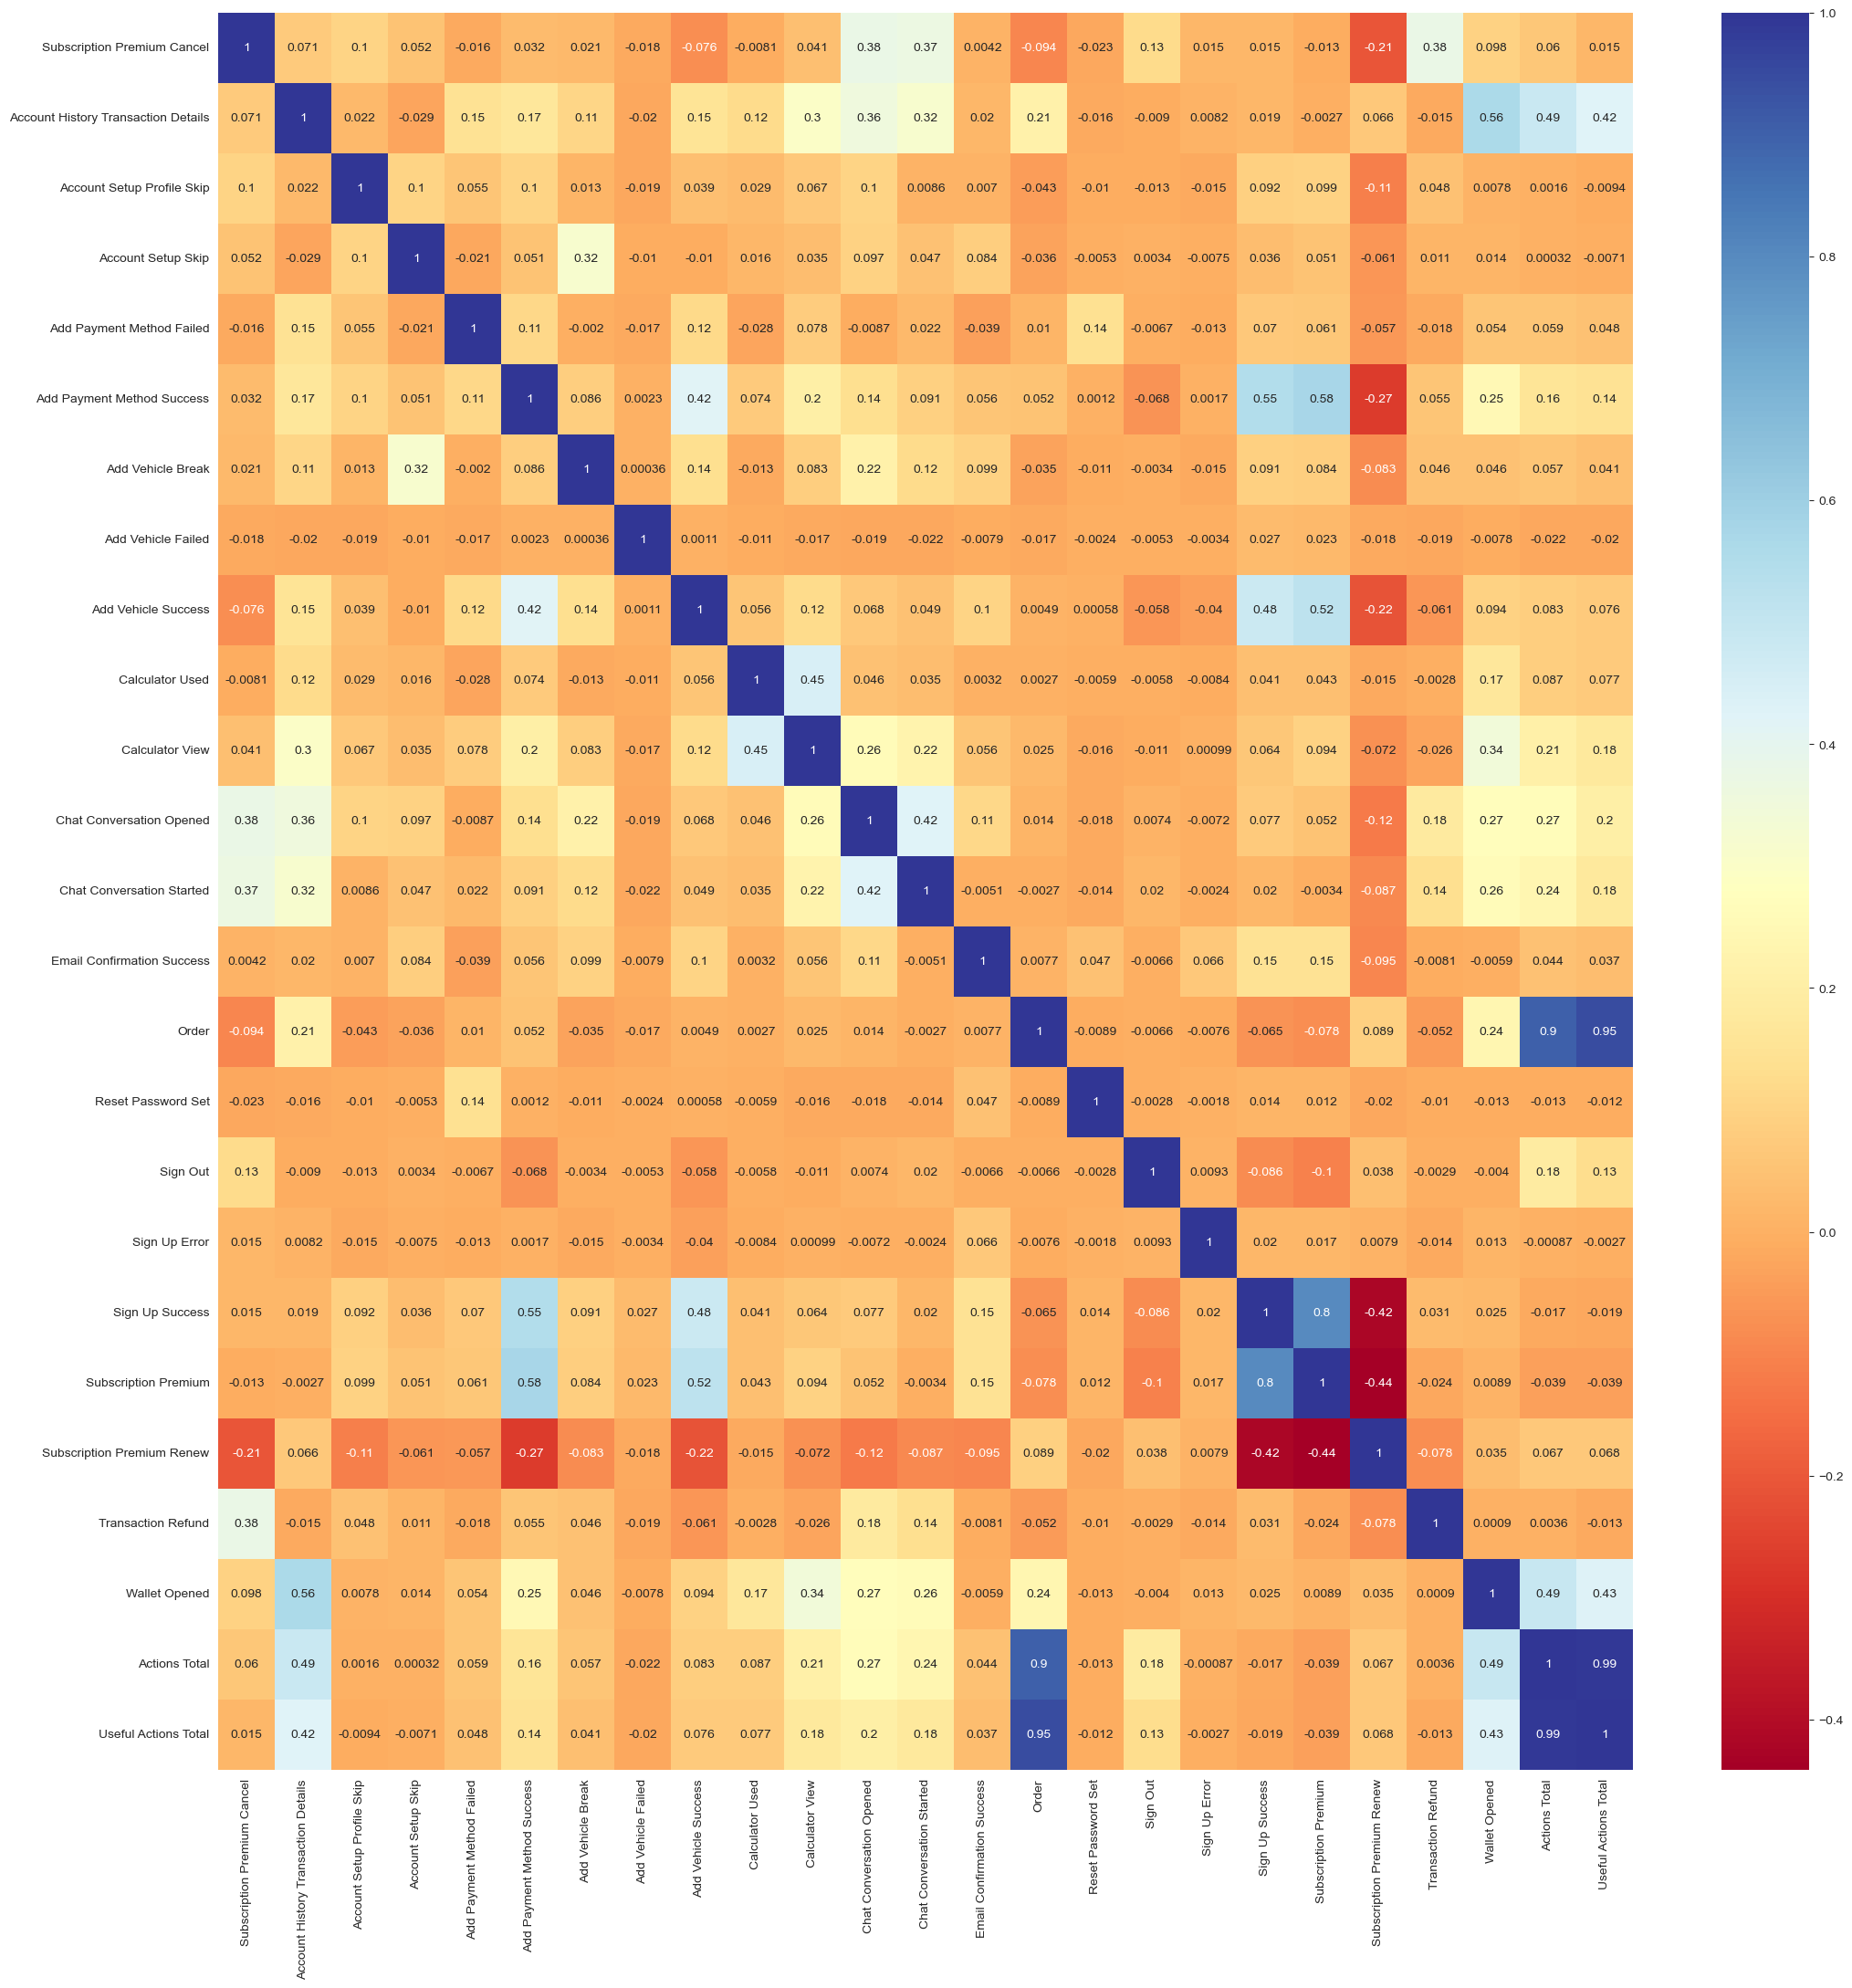

In [93]:
encoded_df_sum_corr = encoded_df_sum.corr()

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(encoded_df_sum_corr, cmap='RdYlBu', annot=True)
plt.show()